# Seeds Dataset
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Seeds_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/seeds_dataset.csv)

In [32]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [33]:
#reading csv file
names = ['Area','Perimeter','Compactness','length_kernel','width_kernel','asy_coefficient','len_kernel_groove','target']
data = pd.read_csv('../../Lab1/Romil/Data/seeds_dataset.csv',header=None,names=names)
data.head()

,Area,Perimeter,Compactness,length_kernel,width_kernel,asy_coefficient,len_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [58]:
X = data.drop(['target','Perimeter','Compactness','length_kernel','width_kernel','len_kernel_groove'],axis=1)
y = data.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
lr.coef_

array([[-0.01877715, -0.7876869 ],
       [ 0.35554248, -0.24844561],
       [-0.59590442,  1.32543277]])

In [103]:
#C = 0.001
lr.predict(X_test)

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [94]:
#C = 1000
lr.predict(X_test)

array([3, 3, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       1, 1, 2, 3, 2, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3, 1, 2, 3,
       1, 2, 2, 1, 3, 2, 1, 2, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2])

In [106]:
#C = 1000000
lr.predict(X_test)

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 2, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 3, 1, 3, 1, 2, 3,
       1, 2, 2, 1, 3, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2])

In [109]:
#C = 1000000000
lr.predict(X_test)

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 2, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 3, 1, 3, 1, 2, 3,
       1, 2, 2, 1, 3, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2])

In [114]:
#C = 0.0000000001
lr.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [115]:
lr.score(X_test,y_test)

0.42857142857142855

In [40]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

In [41]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

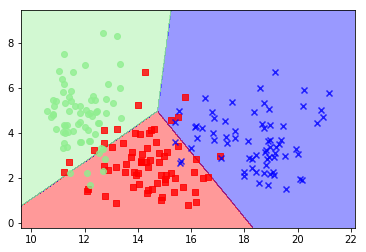

In [42]:
plot_decision_regions(X_combined,
                      y_combined, classifier=lr,
                      test_idx=range(148,210))

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [119]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
lr.score(X_test_std,y_test)

0.8571428571428571

In [121]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

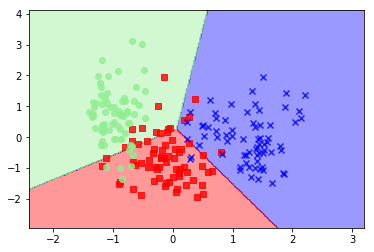

In [122]:
plot_decision_regions(X_combined,
                      y_combined, classifier=lr,
                      test_idx=range(148,210))

In [80]:
 lr.predict_proba(temp)

array([[0.48396215, 0.00249973, 0.51353812]])

In [65]:
X_test_std.shape

(63, 2)

In [66]:
X_test_std[0,:]

array([-0.28017809,  0.18096504])

In [76]:
temp = X_test_std[0,:].reshape(1,2)

In [77]:
temp.shape

(1, 2)

In [81]:
lr.predict(X_test_std)

array([3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3,
       1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1])

In [85]:
y_test


12     1
80     2
33     1
5      1
188    3
83     2
116    2
122    2
90     2
154    3
45     1
156    3
52     1
190    3
96     2
86     2
194    3
37     1
66     1
18     1
170    3
15     1
7      1
55     1
92     2
134    2
125    2
124    2
158    3
185    3
      ..
71     2
187    3
145    3
176    3
118    2
16     1
135    2
191    3
22     1
104    2
141    3
4      1
74     2
136    2
44     1
63     1
108    2
26     1
101    2
166    3
198    3
8      1
40     1
109    2
126    2
129    2
110    2
206    3
107    2
76     2
Name: target, Length: 63, dtype: int64

In [96]:
weights, params = [], []
for c in np.arange(0, 5):
   lr = LogisticRegression(C=10**c, random_state=0)
   lr.fit(X_train_std, y_train)
   weights.append(lr.coef_[1])
   params.append(10**c)

In [97]:
weights = np.array(weights)

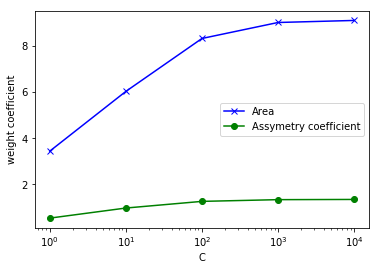

In [100]:
plt.plot(params, weights[:, 0], color='blue', marker='x', label='Area')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='Assymetry coefficient')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

In [116]:
from sklearn import metrics

In [124]:
y_pred = lr.predict(X_test_std)

In [126]:
metrics.accuracy_score(y_test,y_pred, normalize=False)

54

In [128]:
metrics.average_precision_score(y_test,y_pred)

ValueError: multiclass format is not supported

In [129]:
metrics.confusion_matrix(y_test,y_pred)

array([[12,  1,  6],
       [ 2, 25,  0],
       [ 0,  0, 17]])

In [130]:
metrics.recall_score()

ValueError: Target is multiclass but average='binary'. Please choose another average setting.